# Load & basic checks

In [93]:
import pandas as pd

df = pd.read_csv("project_shopping_trends.csv") 
df.head()

,Customer_ID,Age,Gender,Item_Purchased,Category,Purchase_Amount_USD,Location,Size,Color,Season,Review_Rating,Subscription_Status,Payment_Method,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases,Preferred_Payment_Method,Frequency_of_Purchases
0,Customer_ID,Age,Gender,Item_Purchased,Category,Purchase_Amount_USD,Location,Size,Color,Season,Review_Rating,Subscription_Status,Payment_Method,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases,Preferred_Payment_Method,Frequency_of_Purchases
1,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
2,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
3,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
4,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly


In [81]:
df.shape

(3901, 19)

# Clean headers, empty rows, duplicates

In [82]:
# 1. remove fully empty rows
df = df.dropna(how='all').reset_index(drop=True)

# 2. strip column names and whitespace values
df.columns = df.columns.str.strip()
for c in df.select_dtypes(include='object').columns:
    df[c] = df[c].astype(str).str.strip()

# 3. remove exact-duplicate rows
df = df.drop_duplicates().reset_index(drop=True)

# summary
print("After cleaning shape:", df.shape)
display(df.head(3))

After cleaning shape: (3901, 19)


,Customer_ID,Age,Gender,Item_Purchased,Category,Purchase_Amount_USD,Location,Size,Color,Season,Review_Rating,Subscription_Status,Payment_Method,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases,Preferred_Payment_Method,Frequency_of_Purchases
0,Customer_ID,Age,Gender,Item_Purchased,Category,Purchase_Amount_USD,Location,Size,Color,Season,Review_Rating,Subscription_Status,Payment_Method,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases,Preferred_Payment_Method,Frequency_of_Purchases
1,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
2,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly


# Convert types & create helpful columns

In [83]:
import pandas as pd
import numpy as np

# Convert numeric columns
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Purchase_Amount_USD'] = (
    df['Purchase_Amount_USD']
    .astype(str)
    .str.replace('[^0-9.]', '', regex=True)
)
df['Purchase_Amount_USD'] = pd.to_numeric(df['Purchase_Amount_USD'], errors='coerce')
df['Review_Rating'] = pd.to_numeric(df['Review_Rating'], errors='coerce')
df['Previous_Purchases'] = pd.to_numeric(df['Previous_Purchases'], errors='coerce')

# Convert Yes/No columns to 1/0
df['Discount_Applied'] = df['Discount_Applied'].astype(str).str.lower().map({'yes':1,'no':0}).fillna(0).astype(int)
df['Promo_Code_Used']  = df['Promo_Code_Used'].astype(str).str.lower().map({'yes':1,'no':0}).fillna(0).astype(int)

# Map Frequency values to numeric
freq_map = {'Weekly':52, 'Fortnightly':26, 'Monthly':12, 'Occasional':4, 'Daily':365}
df['Frequency_num'] = df['Frequency_of_Purchases'].astype(str).map(freq_map).fillna(0)

# Create Age Group
bins = [0,25,35,45,55,200]
labels = ['18-25','26-35','36-45','46-55','56+']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Show cleaned dataset preview
print("✅ Data cleaned successfully!\n")
print("Shape of dataset:", df.shape)
print("\nPreview of cleaned data:")
display(df.head(5))

✅ Data cleaned successfully!

Shape of dataset: (3901, 21)

Preview of cleaned data:


,Customer_ID,Age,Gender,Item_Purchased,Category,Purchase_Amount_USD,Location,Size,Color,Season,...,Subscription_Status,Payment_Method,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases,Preferred_Payment_Method,Frequency_of_Purchases,Frequency_num,Age_Group
0,Customer_ID,NaN,Gender,Item_Purchased,Category,NaN,Location,Size,Color,Season,...,Subscription_Status,Payment_Method,Shipping_Type,0,0,NaN,Preferred_Payment_Method,Frequency_of_Purchases,0.0,NaN
1,1,55.0,Male,Blouse,Clothing,53.0,Kentucky,L,Gray,Winter,...,Yes,Credit Card,Express,1,1,14.0,Venmo,Fortnightly,26.0,46-55
2,2,19.0,Male,Sweater,Clothing,64.0,Maine,L,Maroon,Winter,...,Yes,Bank Transfer,Express,1,1,2.0,Cash,Fortnightly,26.0,18-25
3,3,50.0,Male,Jeans,Clothing,73.0,Massachusetts,S,Maroon,Spring,...,Yes,Cash,Free Shipping,1,1,23.0,Credit Card,Weekly,52.0,46-55
4,4,21.0,Male,Sandals,Footwear,90.0,Rhode Island,M,Maroon,Spring,...,Yes,PayPal,Next Day Air,1,1,49.0,PayPal,Weekly,52.0,18-25


# Drop rows missing key fields

In [85]:
df = df.dropna(subset=['Customer_ID','Purchase_Amount_USD'])  # must have ID and amount
df['Customer_ID'] = df['Customer_ID'].astype(str)
print("After dropping required-null rows:", df.shape)

After dropping required-null rows: (3900, 21)


# Dataset overview

In [84]:
overview = pd.DataFrame({
    "Total Rows": [df.shape[0]],
    "Total Columns": [df.shape[1]],
    "Unique_Customers": [df['Customer_ID'].nunique()],
    "Avg_Purchase_Amount": [round(df['Purchase_Amount_USD'].mean(),2)],
    "Median_Purchase_Amount": [round(df['Purchase_Amount_USD'].median(),2)]
})
display(overview)


,Total Rows,Total Columns,Unique_Customers,Avg_Purchase_Amount,Median_Purchase_Amount
0,3901,21,3901,59.76,60.0


# Category summary

In [86]:
cat = (
    df.groupby('Category')
      .agg(Total_Orders=('Customer_ID','count'),
           Total_Sales_USD=('Purchase_Amount_USD','sum'),
           Avg_Order_Value=('Purchase_Amount_USD','mean'),
           Discount_Rate=('Discount_Applied','mean'))
      .sort_values('Total_Sales_USD', ascending=False)
)
cat['Discount_Rate_pct'] = (cat['Discount_Rate']*100).round(2)
cat = cat[['Total_Orders','Total_Sales_USD','Avg_Order_Value','Discount_Rate_pct']]
cat = cat.round({'Total_Sales_USD':2,'Avg_Order_Value':2})
display(cat.head(20))

,Total_Orders,Total_Sales_USD,Avg_Order_Value,Discount_Rate_pct
Category,,,,
Clothing,1737,104264.0,60.03,42.08
Accessories,1240,74200.0,59.84,43.79
Footwear,599,36093.0,60.26,43.24
Outerwear,324,18524.0,57.17,44.44


# Discount recommendation candidates

In [87]:
# Candidate categories: low total sales (bottom 30%) but avg order > median
total_sales_q25 = cat['Total_Sales_USD'].quantile(0.25)
avg_order_median = cat['Avg_Order_Value'].median()

candidates = cat[
    (cat['Total_Sales_USD'] <= total_sales_q25) &
    (cat['Avg_Order_Value'] >= avg_order_median)
].sort_values('Total_Sales_USD')

# If empty, relax to bottom 40%
if candidates.empty:
    total_sales_q25 = cat['Total_Sales_USD'].quantile(0.4)
    candidates = cat[
        (cat['Total_Sales_USD'] <= total_sales_q25) &
        (cat['Avg_Order_Value'] >= avg_order_median)
    ].sort_values('Total_Sales_USD')

display(candidates)


,Total_Orders,Total_Sales_USD,Avg_Order_Value,Discount_Rate_pct
Category,,,,
Footwear,599,36093.0,60.26,43.24


# Age / Season / Location analysis

,Orders,Total_Sales,Avg_Spend
Age_Group,,,
18-25,571,34630.0,60.65
46-55,753,45619.0,60.58
26-35,742,44342.0,59.76
36-45,729,43234.0,59.31
56+,1105,65256.0,59.06


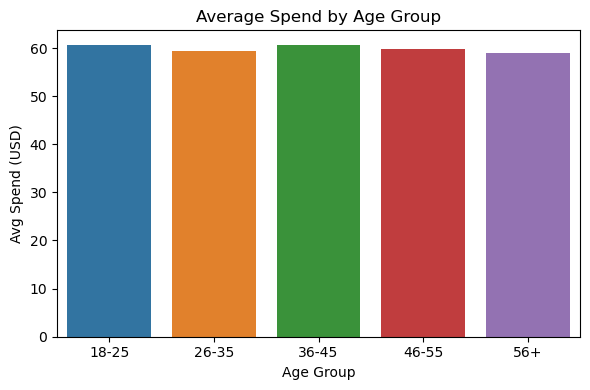

,Orders,Total_Sales,Avg_Spend
Season,,,
Fall,975,60018.0,61.56
Spring,999,58679.0,58.74
Winter,971,58607.0,60.36
Summer,955,55777.0,58.41


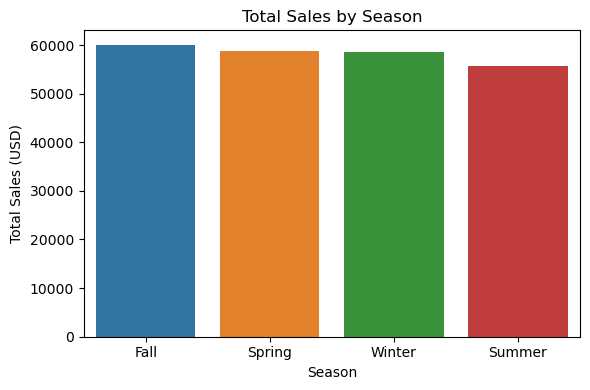

,Orders,Total_Sales,Avg_Spend
Location,,,
Montana,96,5784.0,60.25
Illinois,92,5617.0,61.05
California,95,5605.0,59.00
Idaho,93,5587.0,60.08
Nevada,87,5514.0,63.38
Alabama,89,5261.0,59.11
New York,87,5257.0,60.43
North Dakota,83,5220.0,62.89
West Virginia,81,5174.0,63.88


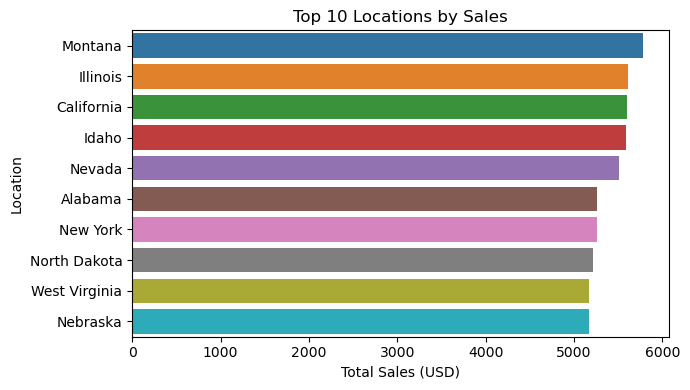

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# Age groups
bins = [0,25,35,45,55,200]
labels = ['18-25','26-35','36-45','46-55','56+']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)
age_tbl = df.groupby('Age_Group')['Purchase_Amount_USD'].agg(Orders='count', Total_Sales='sum', Avg_Spend='mean').round(2)
display(age_tbl.sort_values('Avg_Spend', ascending=False))

plt.figure(figsize=(6,4))
sns.barplot(x=age_tbl.sort_values('Avg_Spend', ascending=False).index, y=age_tbl['Avg_Spend'])
plt.title('Average Spend by Age Group'); plt.ylabel('Avg Spend (USD)'); plt.xlabel('Age Group')
plt.tight_layout(); plt.show()

# Season
season_tbl = df.groupby('Season')['Purchase_Amount_USD'].agg(Orders='count', Total_Sales='sum', Avg_Spend='mean').round(2).sort_values('Total_Sales', ascending=False)
display(season_tbl)

plt.figure(figsize=(6,4))
sns.barplot(x=season_tbl.index, y=season_tbl['Total_Sales'])
plt.title('Total Sales by Season'); plt.ylabel('Total Sales (USD)'); plt.xlabel('Season')
plt.tight_layout(); plt.show()

# Location top 10
loc_tbl = df.groupby('Location')['Purchase_Amount_USD'].agg(Orders='count', Total_Sales='sum', Avg_Spend='mean').round(2).sort_values('Total_Sales', ascending=False)
display(loc_tbl.head(10))

plt.figure(figsize=(7,4))
sns.barplot(y=loc_tbl.head(10).index, x=loc_tbl.head(10)['Total_Sales'])
plt.title('Top 10 Locations by Sales'); plt.xlabel('Total Sales (USD)')
plt.tight_layout(); plt.show()

# Prepare customer-level features for clustering

In [70]:
customers = df.groupby('Customer_ID').agg(
    Age=('Age','median'),
    Gender=('Gender', lambda x: x.mode().iloc[0] if len(x.mode())>0 else x.iloc[0]),
    total_spent=('Purchase_Amount_USD','sum'),
    avg_order=('Purchase_Amount_USD','mean'),
    num_transactions=('Customer_ID','count'),
    frequency_num=('Frequency_num','first'),
    prev_purchases=('Previous_Purchases','first'),
    avg_rating=('Review_Rating','mean'),
    discount_rate=('Discount_Applied','mean'),
    promo_rate=('Promo_Code_Used','mean'),
    preferred_category=('Category', lambda x: x.mode().iloc[0] if len(x.mode())>0 else x.iloc[0])
).reset_index()

customers[['total_spent','avg_order','num_transactions']] = customers[['total_spent','avg_order','num_transactions']].round(2)
display(customers.head(6))
print("customers shape:", customers.shape)

,Customer_ID,Age,Gender,total_spent,avg_order,num_transactions,frequency_num,prev_purchases,avg_rating,discount_rate,promo_rate,preferred_category
0,1,55.0,Male,53,53.0,1,26.0,14,3.1,0.0,0.0,Clothing
1,10,57.0,Male,31,31.0,1,0.0,4,4.8,0.0,0.0,Accessories
2,100,26.0,Male,40,40.0,1,0.0,33,3.7,0.0,0.0,Clothing
3,1000,50.0,Male,28,28.0,1,12.0,23,2.9,0.0,0.0,Clothing
4,1001,43.0,Male,46,46.0,1,0.0,1,3.9,0.0,0.0,Clothing
5,1002,61.0,Male,60,60.0,1,26.0,4,3.6,0.0,0.0,Clothing


customers shape: (3900, 12)


# Feature scaling

In [32]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Features to use for clustering
features = ['Age','total_spent','avg_order','num_transactions','frequency_num','avg_rating','discount_rate','promo_rate']

# Fill missing values with 0
X = customers[features].fillna(0)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert scaled array back to DataFrame to display
X_scaled_df = pd.DataFrame(X_scaled, columns=features)
print("First 5 rows of scaled features:")
display(X_scaled_df.head())

First 5 rows of scaled features:


,Age,total_spent,avg_order,num_transactions,frequency_num,avg_rating,discount_rate,promo_rate
0,0.718913,-0.285629,-0.285629,0.0,0.741066,-0.907584,0.0,0.0
1,0.850444,-1.214590,-1.214590,0.0,-0.686335,1.466284,0.0,0.0
2,-1.188274,-0.834561,-0.834561,0.0,-0.686335,-0.069748,0.0,0.0
3,0.390088,-1.341267,-1.341267,0.0,-0.027534,-1.186862,0.0,0.0
4,-0.070267,-0.581207,-0.581207,0.0,-0.686335,0.209530,0.0,0.0


# Choose K (elbow & silhouette)

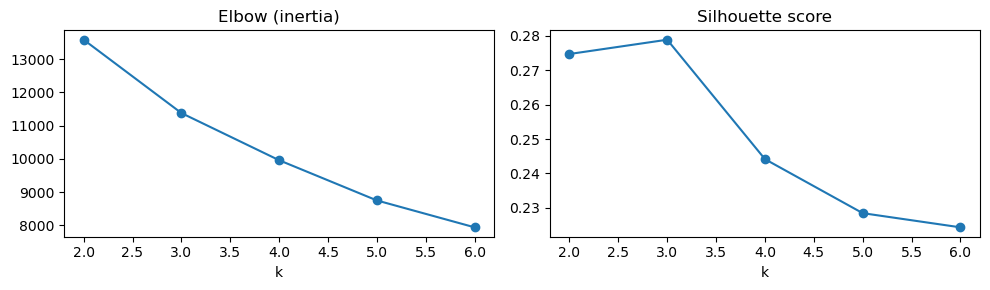

[(2, 13582.2, 0.275), (3, 11378.33, 0.279), (4, 9960.45, 0.244), (5, 8752.07, 0.228), (6, 7943.69, 0.224)]


In [55]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia = []
sil = []
K_range = range(2,7)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10).fit(X_scaled)
    inertia.append(km.inertia_)
    sil.append(silhouette_score(X_scaled, km.labels_))

plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.plot(K_range, inertia, '-o'); plt.xlabel('k'); plt.title('Elbow (inertia)')
plt.subplot(1,2,2)
plt.plot(K_range, sil, '-o'); plt.xlabel('k'); plt.title('Silhouette score')
plt.tight_layout(); plt.show()

print(list(zip(K_range, np.round(inertia,2), np.round(sil,3))))

# Run KMeans & attach labels

In [99]:
k = 3  # or chosen from Cell 12
km = KMeans(n_clusters=k, random_state=42, n_init=10).fit(X_scaled)
customers['Cluster'] = km.labels_

# Cluster sizes
print(customers['Cluster'].value_counts().sort_index())

# Cluster centers in original scale
centers = scaler.inverse_transform(km.cluster_centers_)
centers_df = pd.DataFrame(centers, columns=features).round(2)
centers_df.index.name = 'Cluster'
display(centers_df)

0    1598
1    1596
2     706
Name: Cluster, dtype: int64


,Age,total_spent,avg_order,num_transactions,frequency_num,avg_rating,discount_rate,promo_rate
Cluster,,,,,,,,
0,44.20,81.22,81.22,1.0,4.82,3.80,0.0,0.0
1,44.11,38.42,38.42,1.0,5.44,3.70,0.0,0.0
2,43.68,59.40,59.40,1.0,45.85,3.75,0.0,0.0


# Cluster profiling

In [100]:
cluster_profile = customers.groupby('Cluster').agg(
    Customers=('Customer_ID','count'),
    Avg_Age=('Age','mean'),
    Avg_Total_Spent=('total_spent','mean'),
    Avg_Order=('avg_order','mean'),
    Avg_Transactions=('num_transactions','mean'),
    Avg_Frequency=('frequency_num','mean'),
    Avg_Rating=('avg_rating','mean'),
    Avg_Discount_Rate=('discount_rate','mean'),
    Top_Category=('preferred_category', lambda x: x.mode().iloc[0])
).round(2).reset_index()

cluster_profile['Customers_pct'] = (cluster_profile['Customers']/cluster_profile['Customers'].sum()*100).round(2)
display(cluster_profile)

,Cluster,Customers,Avg_Age,Avg_Total_Spent,Avg_Order,Avg_Transactions,Avg_Frequency,Avg_Rating,Avg_Discount_Rate,Top_Category,Customers_pct
0,0,1598,44.19,81.23,81.23,1.0,4.83,3.80,0.0,Clothing,40.97
1,1,1596,44.12,38.44,38.44,1.0,5.43,3.70,0.0,Clothing,40.92
2,2,706,43.68,59.40,59.40,1.0,45.85,3.75,0.0,Clothing,18.10


# PCA 2D cluster visualization

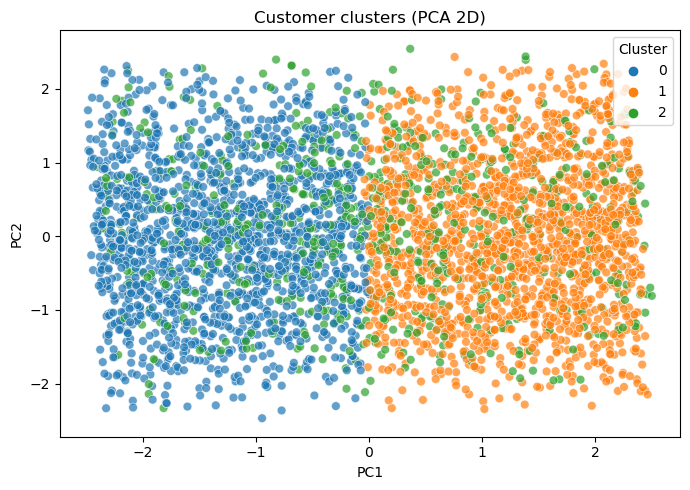

In [101]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pc = pca.fit_transform(X_scaled)
customers['PC1'] = pc[:,0]; customers['PC2'] = pc[:,1]

plt.figure(figsize=(7,5))
sns.scatterplot(data=customers, x='PC1', y='PC2', hue='Cluster', palette='tab10', s=40, alpha=0.7)
plt.title('Customer clusters (PCA 2D)')
plt.legend(title='Cluster')
plt.tight_layout();
plt.savefig("cluster_pca_2d.png")
plt.show()

# Export results

In [51]:
customers.to_csv("customers_with_clusters.csv", index=False)
cluster_profile.to_csv("cluster_profile.csv", index=False)
cat.to_csv("category_summary.csv")
loc_tbl.to_csv("location_summary.csv")
season_tbl.to_csv("season_summary.csv")
print("Saved customers_with_clusters.csv and summary CSVs.")

Saved customers_with_clusters.csv and summary CSVs.


# Suggested marketing actions

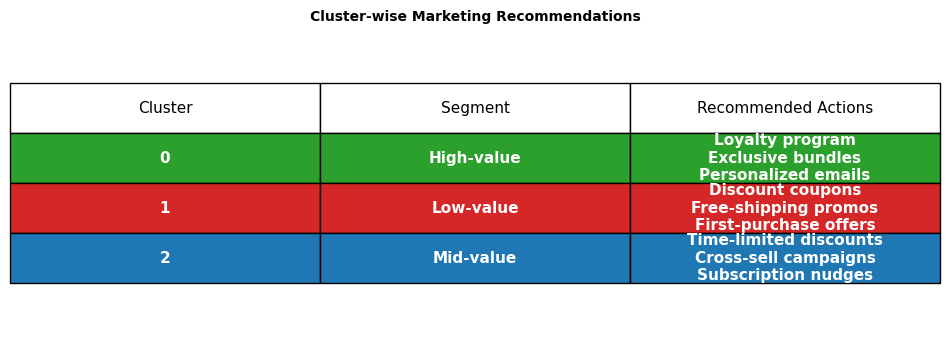

In [103]:
import matplotlib.pyplot as plt

# Prepare cluster-wise marketing suggestions with better spacing
cluster_actions = []

for _, r in cluster_profile.iterrows():
    cid = int(r['Cluster'])
    if r['Avg_Total_Spent'] >= cluster_profile['Avg_Total_Spent'].quantile(0.66):
        tag = "High-value"
        actions = "Loyalty program\nExclusive bundles\nPersonalized emails"
        color = '#2ca02c'  # green
    elif r['Avg_Total_Spent'] >= cluster_profile['Avg_Total_Spent'].quantile(0.33):
        tag = "Mid-value"
        actions = "Time-limited discounts\nCross-sell campaigns\nSubscription nudges"
        color = '#1f77b4'  # blue
    else:
        tag = "Low-value"
        actions = "Discount coupons\nFree-shipping promos\nFirst-purchase offers"
        color = '#d62728'  # red
    cluster_actions.append({
        'Cluster': cid,
        'Segment': tag,
        'Actions': actions,
        'Color': color
    })

# Plot as a table with better spacing
fig, ax = plt.subplots(figsize=(12,4))
ax.axis('off')

table_data = [[c['Cluster'], c['Segment'], c['Actions']] for c in cluster_actions]
table = ax.table(cellText=table_data,
                 colLabels=['Cluster', 'Segment', 'Recommended Actions'],
                 cellLoc='center',
                 colLoc='center',
                 loc='center')

# Color rows and adjust text
for i, c in enumerate(cluster_actions):
    for j in range(3):
        table[(i+1, j)].set_facecolor(c['Color'])
        table[(i+1, j)].set_text_props(color='white', weight='bold')
        table[(i+1, j)].get_text().set_multialignment('center')  # Center multi-line text

# Adjust font size and row height
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1, 3)  # make rows taller for readability

plt.title("Cluster-wise Marketing Recommendations", fontsize=10, weight='bold')
plt.savefig("Market_action.png")
plt.show()

# Wrap-up summary

In [71]:
print("Deliverables ready: customers_with_clusters.csv, cluster_profile.csv, category_summary.csv, location_summary.csv, season_summary.csv")


Deliverables ready: customers_with_clusters.csv, cluster_profile.csv, category_summary.csv, location_summary.csv, season_summary.csv
